# Release and Revision ( commit )

 ### Goal:
     - TO understand if there exist any co relation between the commits and Release in general.
 ### Dataset
     - 3kpython dataset from SHDS ( Containing 3000 most popular repos their commits and release etc.. )
     

# Data

In [79]:
import pandas as pa
import datetime as dt

In [80]:
rev_file = 'release.csv.gz'
r_file = 'revision.csv.gz'

In [81]:
def date_str(str):
    return pa.to_datetime(str, format='%Y-%m-%dT%H:%M:%S.000Z')
release_header = ['id', 'target', 'date', 'date_offset', 'name', 'comment', 'author']
rev_data = pa.read_csv(rev_file,names=release_header,converters={'date':date_str})

## Loading and cleaning the Release dataset

In [82]:
rev_data = rev_data[['date','id']]

In [83]:
rev_data['date'] = rev_data['date'].dt.date

In [84]:
rev_data = rev_data.groupby('date').count()

In [85]:
rev_data.columns = ['release']

In [86]:
rev_data.sort_values('release')

,release
date,
2005-09-16,1
2012-11-26,1
2012-12-05,1
2012-12-08,1
2012-12-18,1
...,...
2013-09-05,27
2014-11-30,27
2011-01-24,32


## Ploting the the Number of release per day.

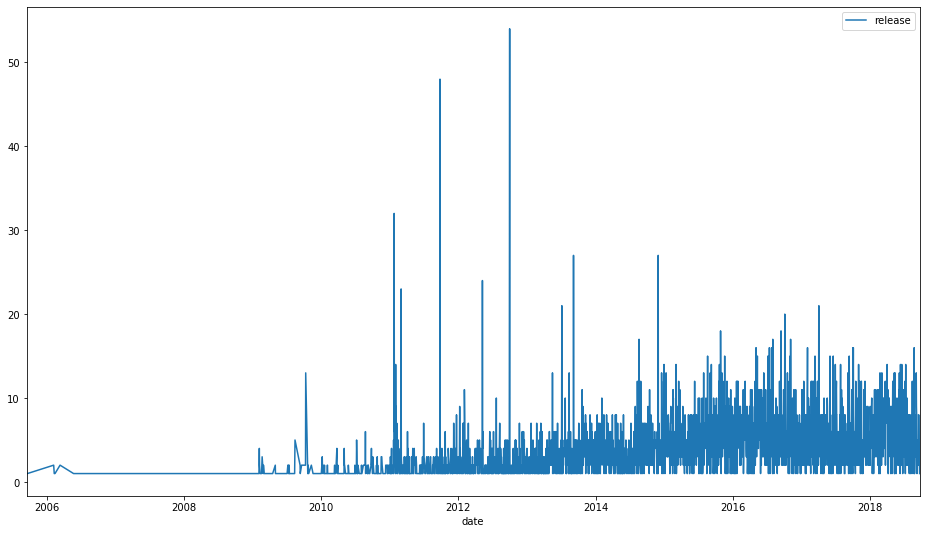

In [87]:
rev_data.plot(figsize=(16,9))

## Scaling the release data
    - To compare with commits data.

In [30]:
rev_data['release'] = rev_data['release']* 100

## Ploting Release data

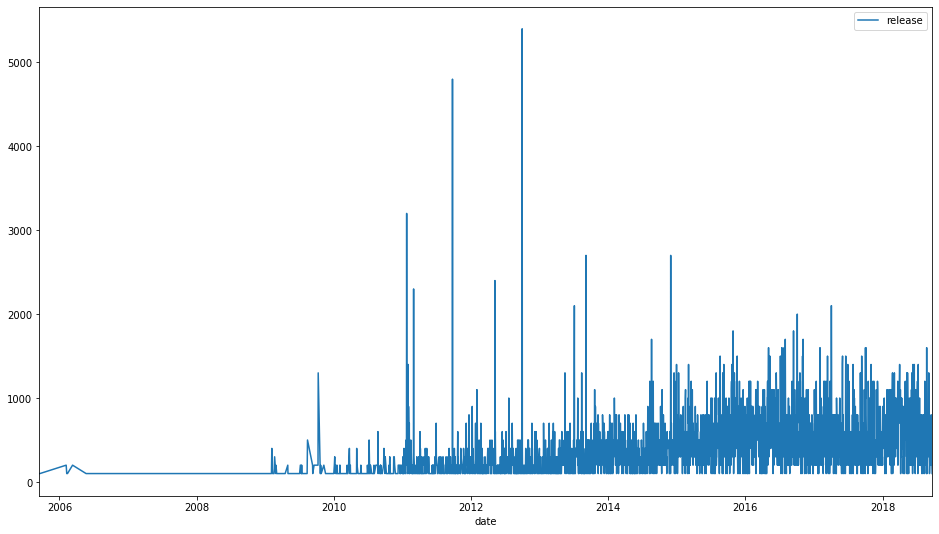

In [34]:
rev_data.plot(figsize=(16,9))

## Loading and cleaning Revision (commits ) dataset

In [37]:
data_i = pa.read_csv(r_file,header=None,chunksize=400000)
def chu(data):
#     print(type(data))
#     exit()
    data.columns = ['id', 'date', 'date_offset', 'committer_date', 'committer_date_offset', 'type', 'directory', 'message', 'author', 'committer']
    return data[['date','id']]
c_list = []
for data_chunk in data_i:
    filterd_chunk = chu(data_chunk)
    c_list.append(filterd_chunk)
r_data = pa.concat(c_list)

In [38]:
r_data.head()

,date,id
0,2015-04-02T01:11:50.000Z,\x01714ff5fd94a846f7dc3456a52e6f2dcd36ca0b
1,2010-08-14T17:15:31.000Z,\x01d76a45b817be788eab3e27a93e41c74a6d8957
2,2013-09-27T17:02:55.000Z,\x03ac0bf5d03af97bc7dc7c5aa67d8ee346f8cd1c
3,2011-10-25T20:11:52.000Z,\x05c9110ba2615d42af41a77138bc62dd18278320
4,2017-10-31T20:29:21.000Z,\x06de8d8e88d5b6311ea3feae369c85d157c9dfe3


In [47]:
r_data['date'] = pa.to_datetime(r_data['date']).dt.date

In [53]:
# r_data = r_data.drop('data',axis=1)

In [54]:
r_data.head()

,date,id
0,2015-04-02,\x01714ff5fd94a846f7dc3456a52e6f2dcd36ca0b
1,2010-08-14,\x01d76a45b817be788eab3e27a93e41c74a6d8957
2,2013-09-27,\x03ac0bf5d03af97bc7dc7c5aa67d8ee346f8cd1c
3,2011-10-25,\x05c9110ba2615d42af41a77138bc62dd18278320
4,2017-10-31,\x06de8d8e88d5b6311ea3feae369c85d157c9dfe3


In [57]:
r_data = r_data.groupby('date').count()

In [58]:
r_data.columns = ['revision']

In [59]:
r_data.head()

,revision
date,
1980-01-20,2
1988-01-16,1
1988-05-02,1
1988-06-01,1
1988-06-13,1


## Ploting Revision data

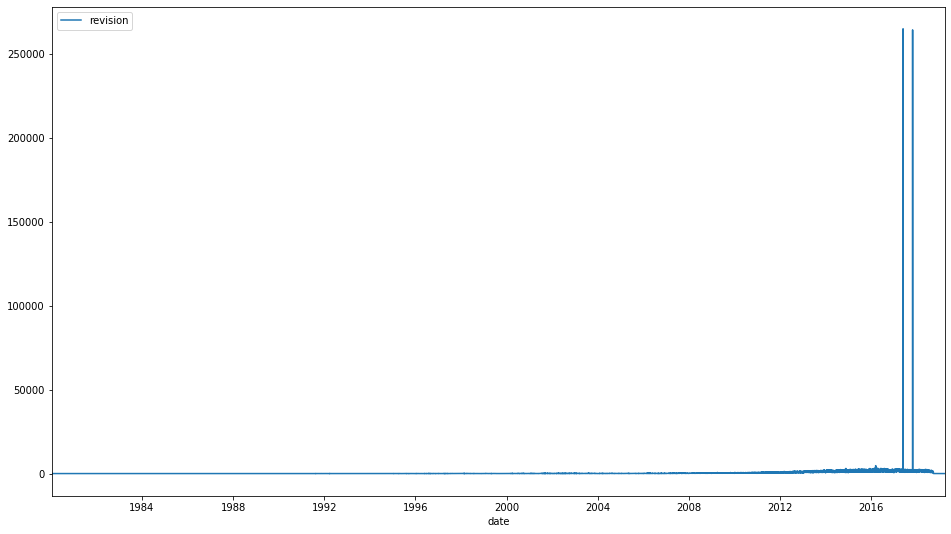

In [62]:
r_data.plot(figsize=(16,9))

## Removing Outliers in revisions


In [69]:
r_data.sort_values('revision',ascending=False).head()

,revision
date,
2017-05-23,264790
2017-10-23,264143
2016-03-10,4732
2016-03-12,4288
2016-03-22,3253


- The case of having 264,143 commits is very very very low . if has to be thought also then it will now be related on one vanalarablity so we can  removing the two data points.

In [71]:
r_data = r_data[r_data['revision']<5000]

In [72]:
r_data.head()

,revision
date,
2016-03-10,4732
2016-03-12,4288
2016-03-22,3253
2016-03-14,3229
2016-04-12,3224


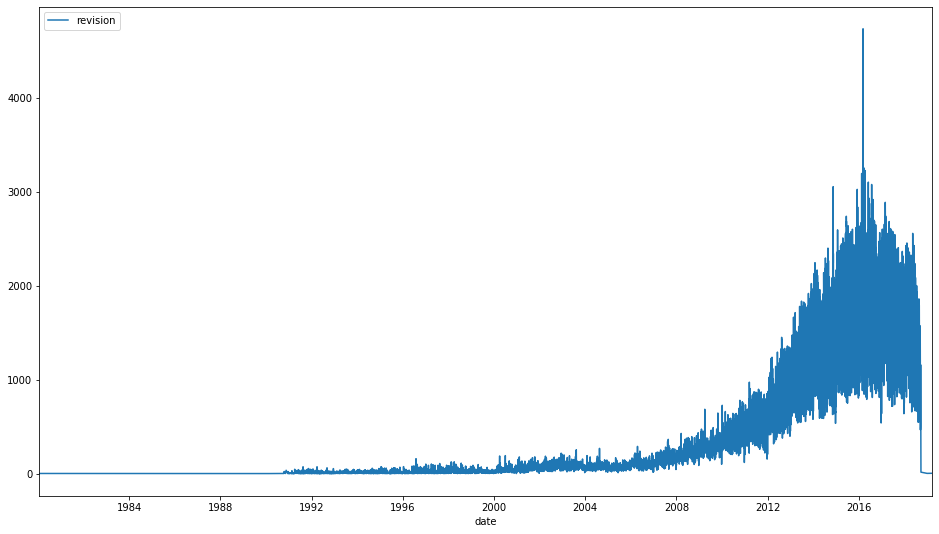

In [73]:
r_data.plot(figsize=(16,9))

## Ploting together to see if any co-relation exist between them or not.

In [99]:
data = pa.merge(r_data,rev_data,on='date')

In [100]:
data.head()

,revision,release
date,,
2016-03-10,4732,8
2016-03-12,4288,4
2016-03-22,3253,5
2016-03-14,3229,3
2016-04-12,3224,11


## Comparing revisions and releases

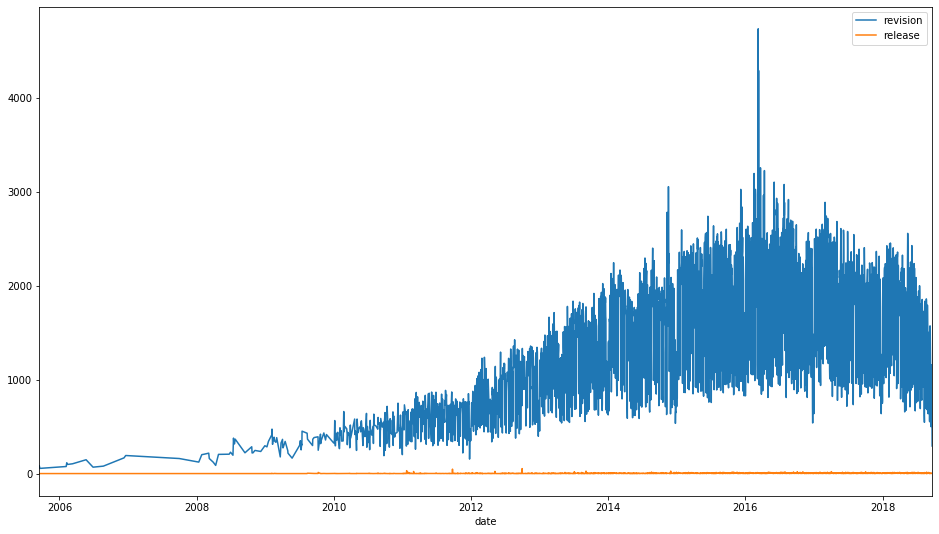

In [101]:
data.plot(figsize=(16,9))

## Scaling data for better comparision

In [104]:
data['release'] = data['release']* 100

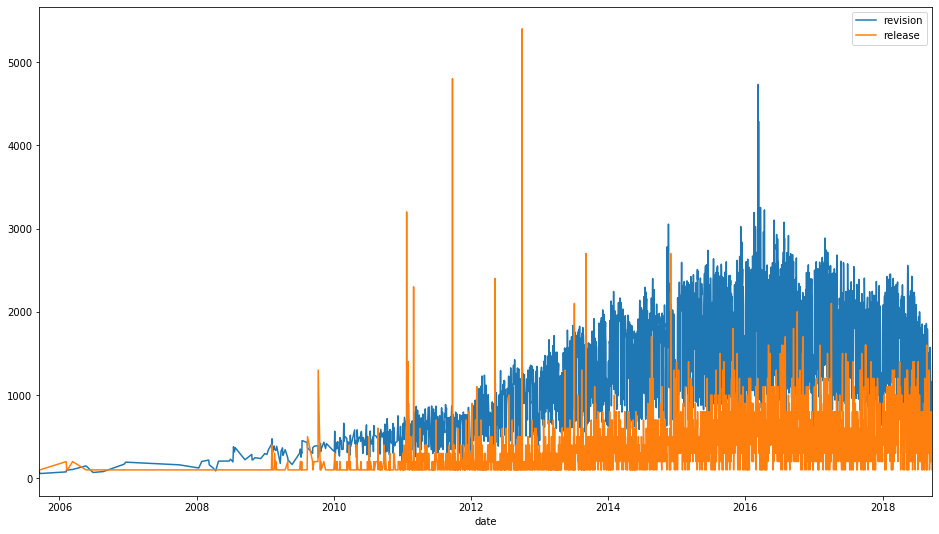

In [105]:
data.plot(figsize=(16,9))

## Down Scaleing revision data and keeing revision as it is

In [90]:
c = data

In [93]:
c['revision'] = c['revision'] / 100

In [95]:
c['release'] = c['release']/100

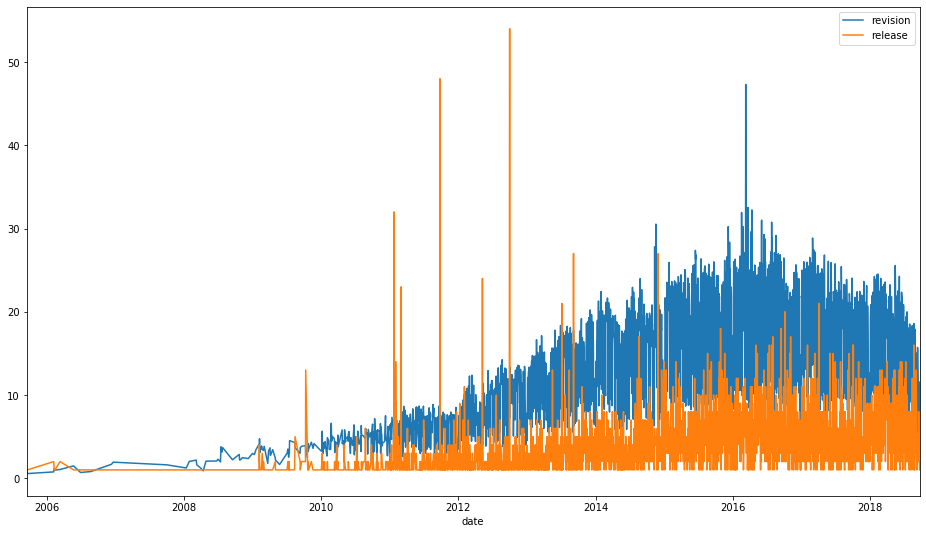

In [97]:
c.plot(figsize=(16,9))